In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import models.config as config
pd.options.mode.copy_on_write = True

In [2]:
data = pd.read_csv("data/results/results.csv", converters={"district": config.District.from_string})
data

,pre_dissim_wnw,post_dissim_wnw,pre_dissim_bh_wa,post_dissim_bh_wa,district,dissimilarity_weight,population_metric_weight,pre_population_average_divergence,pre_population_median_divergence,post_population_average_divergence,...,switcher_status_quo_time_num_asian,switcher_status_quo_time_num_native,switcher_status_quo_time_num_hispanic,switcher_status_quo_time_num_total,switcher_new_time_num_white,switcher_new_time_num_black,switcher_new_time_num_asian,switcher_new_time_num_native,switcher_new_time_num_hispanic,switcher_new_time_num_total
0,0.381553,0.285410,0.424235,0.333856,"(VA, 5101260)",1,1,0.063026,0.049379,0.041294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.381553,0.249724,0.424235,0.342139,"(VA, 5101260)",1,0,0.063026,0.049379,0.131047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.381553,0.322253,0.424235,0.354796,"(VA, 5101260)",0,1,0.063026,0.049379,0.038789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.592172,0.546081,0.575128,0.495727,"(WI, 5509600)",1,1,0.089594,0.074698,0.043678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.592172,0.540829,0.575128,0.488729,"(WI, 5509600)",1,0,0.089594,0.074698,0.122256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.089411,0.052891,0.097876,0.061529,"(AZ, 0401680)",1,1,0.062127,0.048394,0.042307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,0.387727,0.123812,0.325730,0.115292,"(AL, 0100270)",1,1,0.086006,0.061569,0.062623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,0.387727,0.247785,0.325730,0.197257,"(AL, 0100270)",0,1,0.086006,0.061569,0.053596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,0.089411,0.045363,0.097876,0.063507,"(AZ, 0401680)",1,0,0.062127,0.048394,0.096442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
(~np.isnan(data["switcher_new_time_num_total"])).sum()

np.int64(0)

In [4]:
dissimilarity = data[
    (data["dissimilarity_weight"] == 1) & (data["population_metric_weight"] == 0)
]
population = data[
    (data["dissimilarity_weight"] == 0) & (data["population_metric_weight"] == 1)
]
both = data[
    (data["dissimilarity_weight"] == 1) & (data["population_metric_weight"] == 1)
]

groups = ["dissimilarity", "population", "both"]
for df in groups:
    locals()[df].drop(["dissimilarity_weight", "population_metric_weight"], inplace=True, axis=1)
    locals()[df].loc[:, "objective"] = df

data = pd.concat([dissimilarity, population, both])

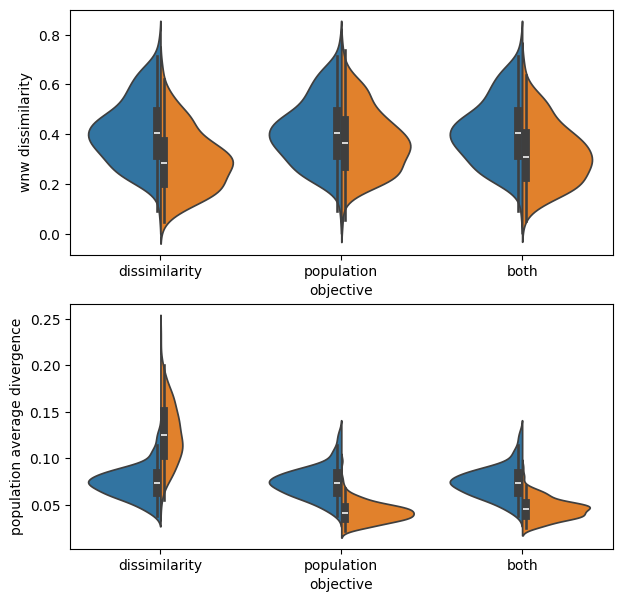

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

melted_first = data.melt(
    value_vars=["pre_dissim_wnw", "post_dissim_wnw"],
    value_name="wnw dissimilarity",
    var_name="pre_or_post",
    id_vars="objective",
)
sns.violinplot(
    x="objective",
    y="wnw dissimilarity",
    data=melted_first,
    split=True,
    hue="pre_or_post",
    ax=axes[0]
)

melted_second = data.melt(
    value_vars=["pre_population_average_divergence", "post_population_average_divergence"],
    value_name="population average divergence",
    var_name="pre_or_post",
    id_vars="objective",
)
sns.violinplot(
    x="objective",
    y="population average divergence",
    data=melted_second,
    split=True,
    hue="pre_or_post",
    ax=axes[1]
)

for axis in axes:
    axis.get_legend().remove()

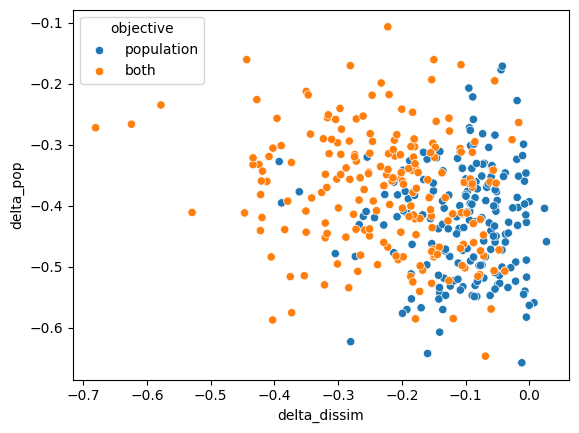

In [6]:
data["delta_dissim"] = (data["post_dissim_wnw"] - data["pre_dissim_wnw"]) / data["pre_dissim_wnw"]
data["delta_pop"] = (data["post_population_average_divergence"] - data["pre_population_average_divergence"]) / data["pre_population_average_divergence"]
sns.scatterplot(
    data=data[(data["delta_pop"] < 0) & (data["objective"] != "dissimilarity")],
    x="delta_dissim",
    y="delta_pop",
    hue="objective"
)
plt.savefig("out.png")

In [7]:
data[(data["delta_pop"] > 0) & (data["objective"] != "dissimilarity")]

,pre_dissim_wnw,post_dissim_wnw,pre_dissim_bh_wa,post_dissim_bh_wa,district,pre_population_average_divergence,pre_population_median_divergence,post_population_average_divergence,post_population_median_divergence,num_white_all,...,switcher_status_quo_time_num_total,switcher_new_time_num_white,switcher_new_time_num_black,switcher_new_time_num_asian,switcher_new_time_num_native,switcher_new_time_num_hispanic,switcher_new_time_num_total,objective,delta_dissim,delta_pop


In [8]:
np.corrcoef(data[(data["delta_pop"] < 0) & (data["objective"] != "dissimilarity")]["delta_dissim"], data[(data["delta_pop"] < 0) & (data["objective"] != "dissimilarity")]["delta_pop"])

array([[ 1.        , -0.23283189],
       [-0.23283189,  1.        ]])

<Axes: xlabel='post_dissim_wnw', ylabel='Count'>

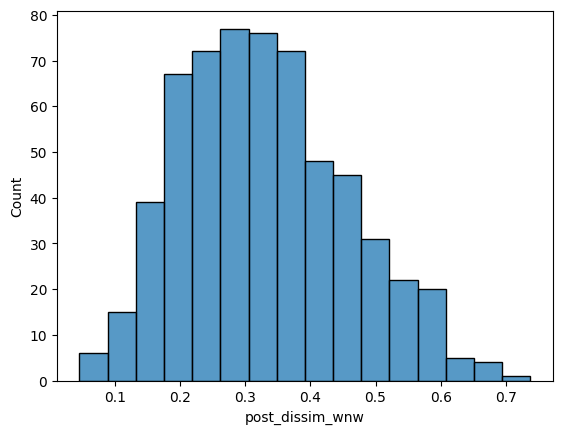

In [9]:
sns.histplot(
    data=data,
    x="post_dissim_wnw"
)

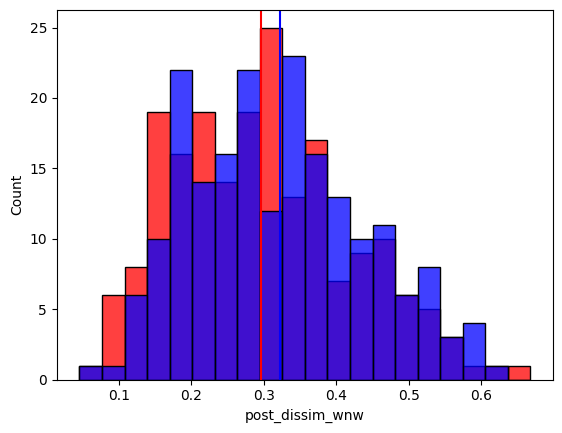

In [10]:
def add_the_hist(data, bins, color, column="post_dissim_wnw"):
    sns.histplot(
        data=data,
        x="post_dissim_wnw",
        bins=bins,
        color=color,
    )
    plt.axvline(np.mean(data[column]), color=color)


bins = np.histogram(dissimilarity["post_dissim_wnw"], bins=20)[1]
add_the_hist(dissimilarity, bins, "red")
# add_the_hist(dissimilarity, bins, "green", "pre_dissim_wnw")
# add_the_hist(population, bins, "yellow")
add_the_hist(both, bins, "blue")